In [1]:
# EDA MOdule importing
import shutil

shutil.copy('/content/drive/MyDrive/DA_Library/EDA.py','EDA.py')

'EDA.py'

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import EDA as eda

In [3]:
raw_data = eda.readfile('/content/drive/MyDrive/Ajinkya_Patil_Plant Disease Detection /Processed_data&models/Potato/dataset_potato.xlsx')

In [4]:
raw_data.dtypes

Unnamed: 0      int64
area          float64
perimeter     float64
red_mean      float64
green_mean    float64
blue_mean     float64
f1            float64
f2            float64
red_std       float64
green_std     float64
blue_std      float64
f4            float64
f5            float64
f6            float64
f7            float64
f8            float64
label           int64
dtype: object

In [5]:
raw_data.drop(['Unnamed: 0'],axis = 1, inplace=True)

In [6]:
raw_data.columns

Index(['area', 'perimeter', 'red_mean', 'green_mean', 'blue_mean', 'f1', 'f2',
       'red_std', 'green_std', 'blue_std', 'f4', 'f5', 'f6', 'f7', 'f8',
       'label'],
      dtype='object')

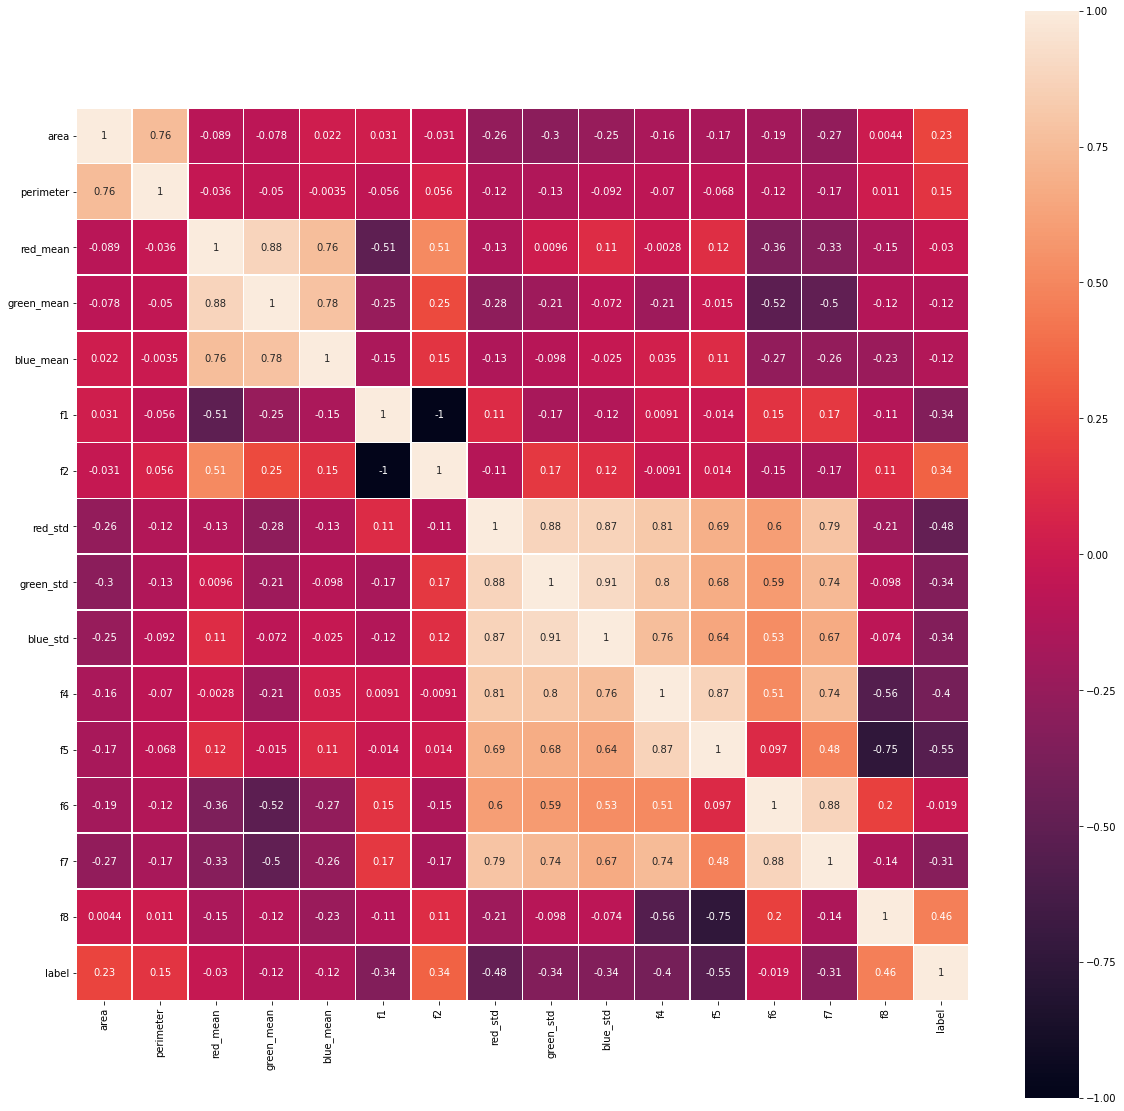

In [7]:
eda.correlation(raw_data)

In [8]:
eda.correlationlist(raw_data)

area
The Pearson Correlation Coefficient is 0.22622036172489565  with a P-value of P = 8.14470352607187e-67
True
------------------------------------------------------------------------------------------
perimeter
The Pearson Correlation Coefficient is 0.14928060068025598  with a P-value of P = 1.1627810484044809e-29
True
------------------------------------------------------------------------------------------
red_mean
The Pearson Correlation Coefficient is -0.030087456545760612  with a P-value of P = 0.023367082145348446
True
------------------------------------------------------------------------------------------
green_mean
The Pearson Correlation Coefficient is -0.11565693286004487  with a P-value of P = 2.2651424439997154e-18
True
------------------------------------------------------------------------------------------
blue_mean
The Pearson Correlation Coefficient is -0.1233912226100317  with a P-value of P = 1.036067434362133e-20
True
-------------------------------------------

**Insights:**
Less correlated features are:
- Red channel mean
- f6

Also f1 and f2 are mutually relative So one of them can be removed

In [9]:
cleaned_data = raw_data.drop(['red_mean','f6','f1'],axis = 1, inplace=False)

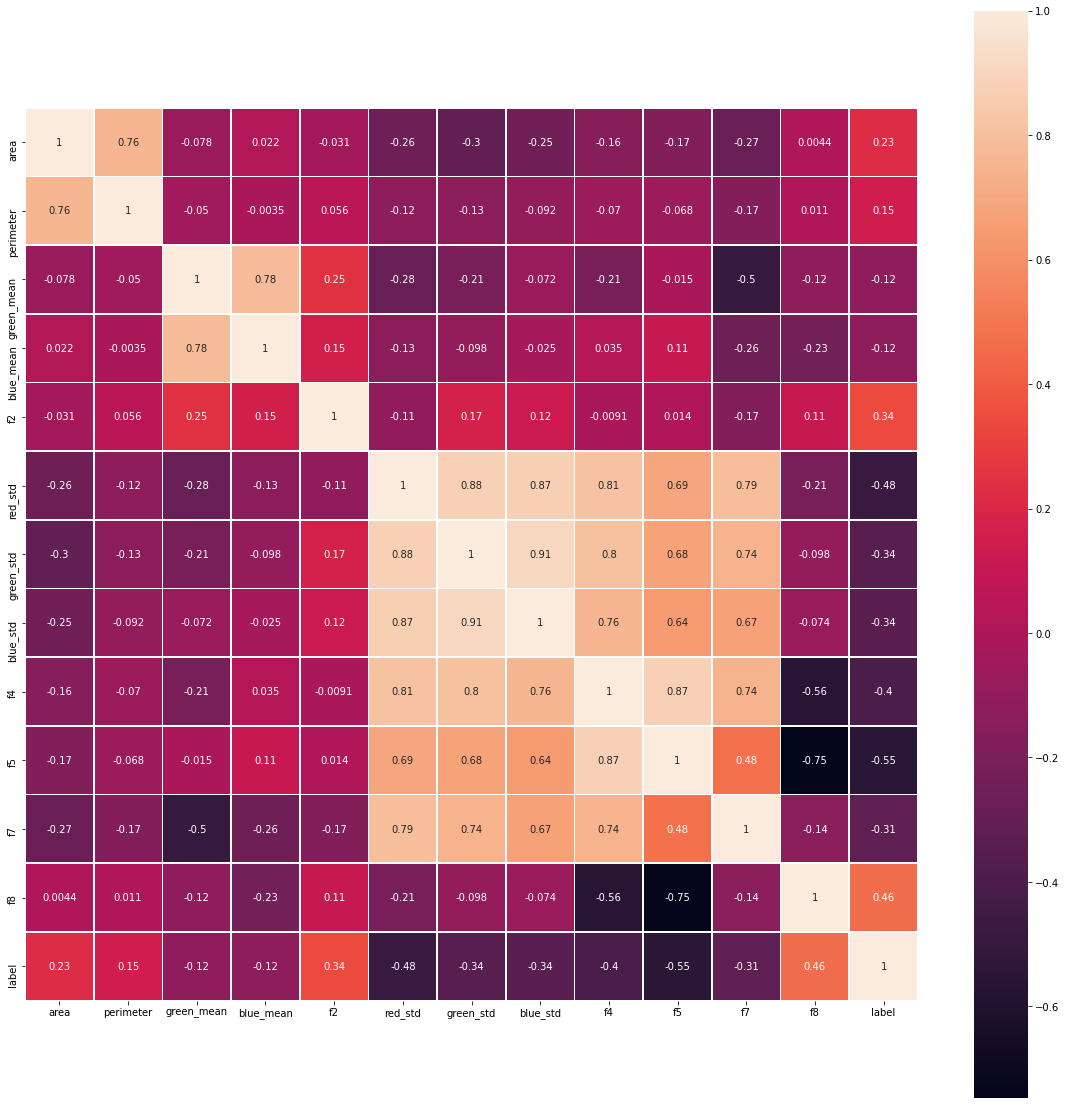

In [10]:
eda.correlation(cleaned_data)

In [11]:
cleaned_data = eda.removenullrows(cleaned_data)

In [12]:
raw_data.shape

(5679, 16)

In [13]:
cleaned_data.shape

(5679, 13)

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import KFold 


In [15]:
df = cleaned_data.reset_index()

In [16]:
X = df.drop(['index','label'],axis = 1, inplace=False)
y = df['label']
print(X.shape)
print(y.shape)

(5679, 12)
(5679,)


In [17]:
k = 5
kf = KFold(n_splits=k, random_state=9, shuffle = True)
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state = 50,n_estimators = 50,max_samples = 0.7)
 
acc_score = []

for train_index , test_index in kf.split(X):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]
    model = RandomForestClassifier(random_state = 50,n_estimators = 50,max_samples = 0.7)
    model.fit(X_train,y_train)
    pred_values = model.predict(X_test)            # classification
    acc = accuracy_score(pred_values , y_test)     # Classification

    #acc = model.score(X_test,y_test)                # Regression
    
    acc_score.append(acc)
     
avg_acc_score = sum(acc_score)/k
 
print('Score of each fold - {}'.format(acc_score))
print('Avg Score : {}'.format(avg_acc_score))

Score of each fold - [0.9894366197183099, 0.9876760563380281, 0.9806338028169014, 0.9876760563380281, 0.9814977973568282]
Avg Score : 0.9853840665136191


# **K- fold Cross validation accuracy:**
# **0.9853840665136191**

# ROC Curve

In [18]:
!pip install scikit-plot

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


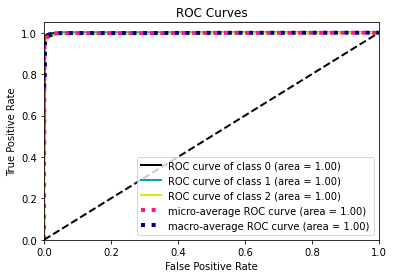

In [19]:
import scikitplot as skplt
import matplotlib.pyplot as plt

y_true = y_test
y_probas = model.predict_proba(X_test)
skplt.metrics.plot_roc_curve(y_true, y_probas)



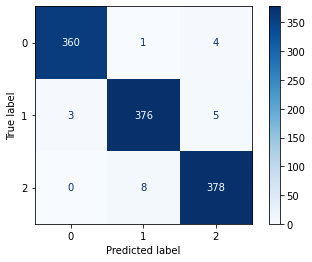

In [21]:
from sklearn.metrics import plot_confusion_matrix
y_pred = model.predict(X_test)
plot_confusion_matrix(model, X_test, y_test, values_format = 'd',cmap = 'Blues',display_labels = ['0','1','2'])

In [22]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, [0,1,2]))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       365
           1       0.98      0.98      0.98       384
           2       0.98      0.98      0.98       386

    accuracy                           0.98      1135
   macro avg       0.98      0.98      0.98      1135
weighted avg       0.98      0.98      0.98      1135



# **F1 Score:**
# **0.98**

# Deployment

In [23]:
from sklearn.ensemble import RandomForestClassifier
lm = RandomForestClassifier(random_state = 50,n_estimators = 50,max_samples = 0.7)
lm.fit(X,y)
print('Training Score: ',lm.score(X,y))

Training Score:  0.9996478253213594


In [24]:
lm.feature_importances_

array([0.0451521 , 0.03648243, 0.15554436, 0.04782975, 0.15656995,
       0.0925633 , 0.07545375, 0.0881932 , 0.10352548, 0.08432586,
       0.06236455, 0.05199526])

In [25]:
import pickle
filename = '/content/drive/MyDrive/Ajinkya_Patil_Plant Disease Detection /Processed_data&models/Potato/Results/potatomodel_V1.sav'
pickle.dump(lm, open(filename, 'wb'))

In [26]:
filename = '/content/drive/MyDrive/Ajinkya_Patil_Plant Disease Detection /Processed_data&models/Potato/Results/potatomodel_V1.sav'

dep_model = pickle.load(open(filename, 'rb'))

print(dep_model.score(X,y))

0.9996478253213594


# Selected Features

In [27]:
X.columns

Index(['area', 'perimeter', 'green_mean', 'blue_mean', 'f2', 'red_std',
       'green_std', 'blue_std', 'f4', 'f5', 'f7', 'f8'],
      dtype='object')

# Label Dictionary

- 0: Potato___healthy
- 1: Potato___Early_blight
- 2: Potato___Late_blight

# Performance
- Accuracy : 0.9853
- F1 score : 0.98